In [41]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('Car Details.csv')
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Y


In [43]:
df['mileage'] = df['mileage'].str.split(r'kmpl').str.get(0)

In [44]:
df['mileage'] = df['mileage'].str.split(r'km/kg').str.get(0)

In [45]:
df['engine'] = df['engine'].str.split(r'CC').str.get(0)

In [46]:
df['max_power'] = df['max_power'].str.split(r'bhp').str.get(0)

In [47]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4,1248,74,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0,1396,90,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5,Y


In [48]:
df.drop(['Sales_ID','State or Province','City','seats'],axis=1,inplace=True)

In [49]:
df.drop('name',axis=1,inplace=True)

In [50]:
df['mileage'] = df['mileage'].astype(float)

In [51]:
df['engine'] = df['engine'].astype(float)

In [52]:
df['max_power'] = df['max_power'].astype(float)

In [53]:
df1 = df[['mileage','engine','max_power','selling_price','km_driven']]

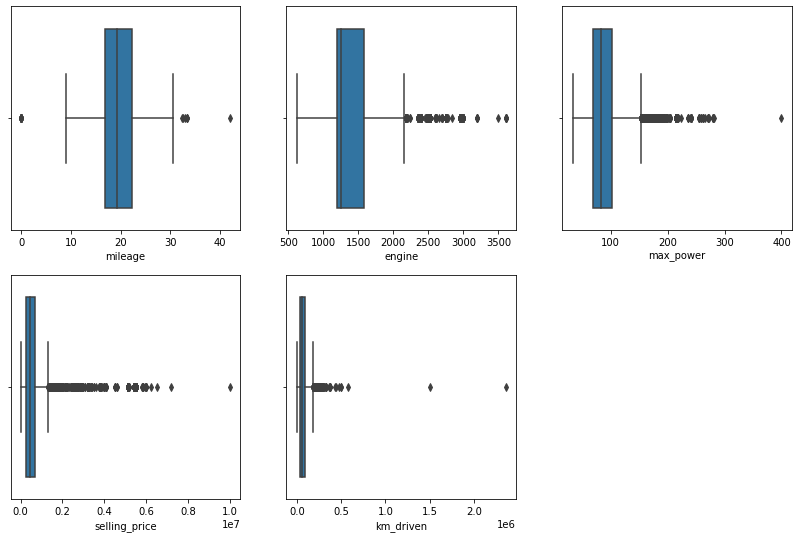

In [54]:
plt.figure(figsize=(14,14),facecolor='white')
v=1
for i in df1.columns:
    ax=plt.subplot(3,3,v)
    sns.boxplot(df1[i])
    v+=1
plt.show() 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   Region         7906 non-null   object 
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  sold           7906 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 741.3+ KB


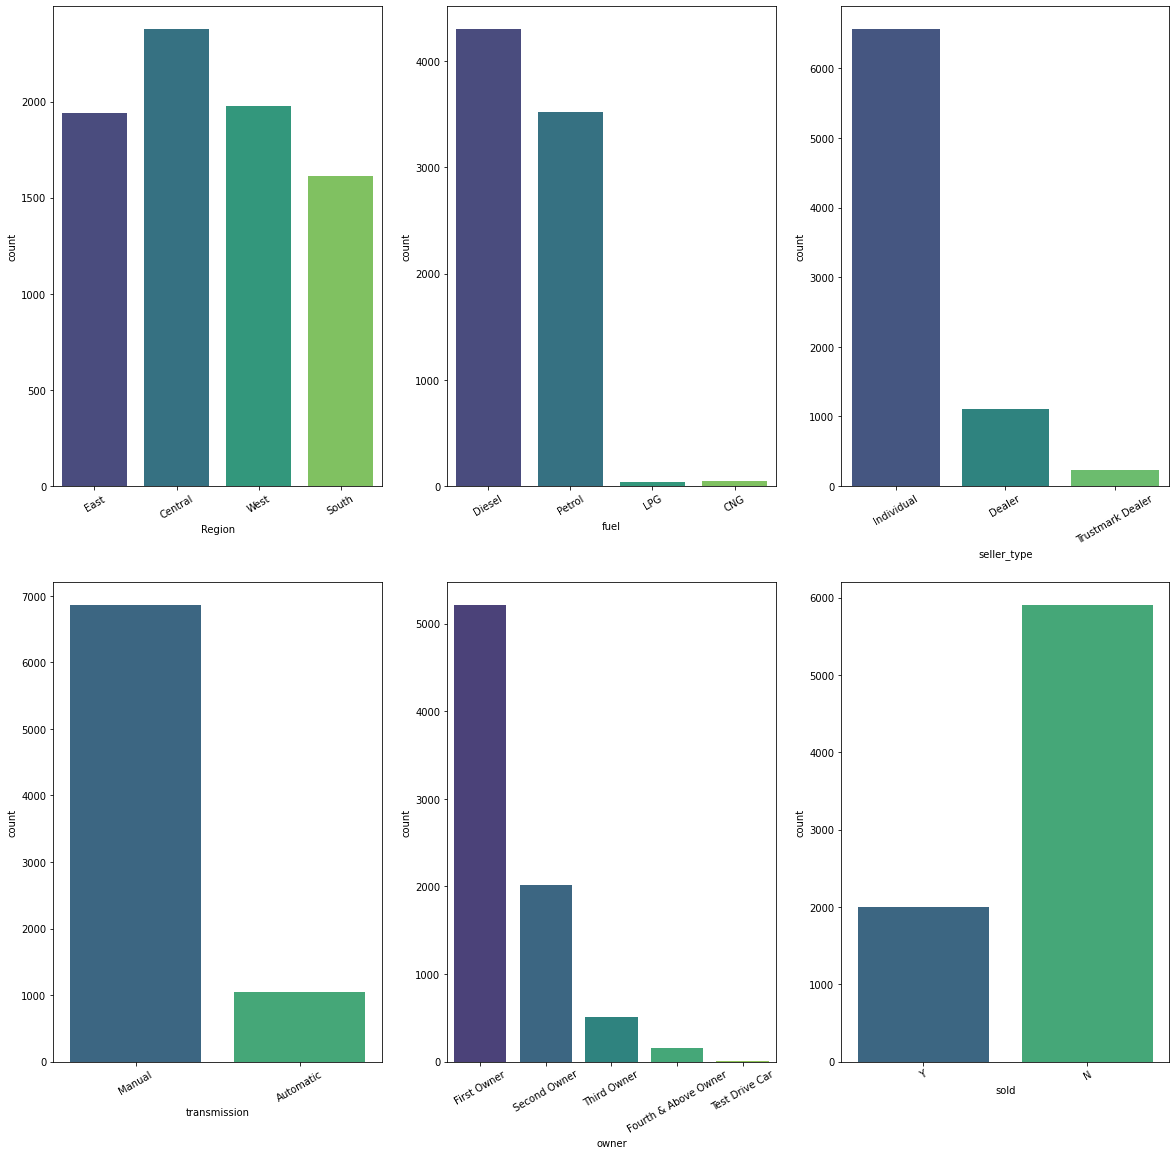

In [56]:
plt.figure(figsize=(20,30),facecolor='white')
v=1
for i in df.select_dtypes(include='object'):
    ax=plt.subplot(3,3,v)
    sns.countplot(df[i],palette='viridis')
    plt.xticks(rotation=30)
    v+=1
plt.show() 

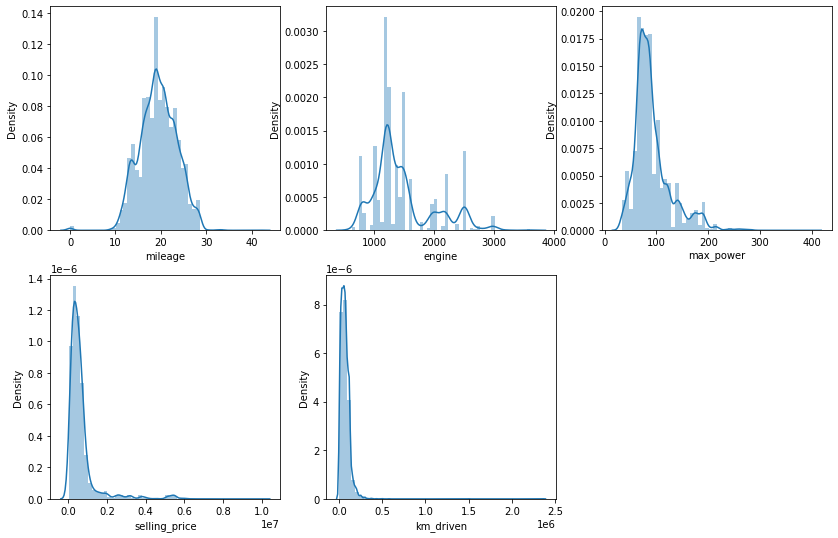

In [57]:
plt.figure(figsize=(14,14),facecolor='white')
v=1
for i in df1.columns:
    ax=plt.subplot(3,3,v)
    sns.distplot(df1[i],kde=True)
    v+=1
plt.show() 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df.head()

,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,sold
0,2014,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,Y
1,2014,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,Y
2,2006,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,Y
3,2010,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,Y
4,2007,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,Y


In [60]:
df['sold'].value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

# Target Variable is imbalanced. So I will apply SMOTE to Balance the data.

In [61]:
df = pd.get_dummies(df,columns=['Region','fuel','seller_type','owner','transmission'],drop_first=True)

In [62]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,sold,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual
0,2014,450000,145500,23.40,1248.0,74.00,Y,1,0,0,1,0,0,1,0,0,0,0,0,1
1,2014,370000,120000,21.14,1498.0,103.52,Y,1,0,0,1,0,0,1,0,0,1,0,0,1
2,2006,158000,140000,17.70,1497.0,78.00,Y,0,0,0,0,0,1,1,0,0,0,0,1,1
3,2010,225000,127000,23.00,1396.0,90.00,Y,0,0,0,1,0,0,1,0,0,0,0,0,1
4,2007,130000,120000,16.10,1298.0,88.20,Y,1,0,0,0,0,1,1,0,0,0,0,0,1


In [63]:
df['sold'] = df['sold'].replace({'N':0,'Y':1})

In [64]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,sold,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual
0,2014,450000,145500,23.40,1248.0,74.00,1,1,0,0,1,0,0,1,0,0,0,0,0,1
1,2014,370000,120000,21.14,1498.0,103.52,1,1,0,0,1,0,0,1,0,0,1,0,0,1
2,2006,158000,140000,17.70,1497.0,78.00,1,0,0,0,0,0,1,1,0,0,0,0,1,1
3,2010,225000,127000,23.00,1396.0,90.00,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,2007,130000,120000,16.10,1298.0,88.20,1,1,0,0,0,0,1,1,0,0,0,0,0,1


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10,sampling_strategy='minority')
x,y = sm.fit_resample(df.drop('sold',axis=1),df['sold'])
df = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)

In [67]:
df['sold'].value_counts()

1    5906
0    5906
Name: sold, dtype: int64

In [68]:
df[['year','selling_price','km_driven','mileage','engine','max_power']] = scaler.fit_transform(df[['year','selling_price','km_driven','mileage','engine','max_power']])

In [69]:
df.head()

,sold,year,selling_price,km_driven,mileage,engine,max_power,Region_East,Region_South,Region_West,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual
0,1,0.036937,-0.245654,1.418762,1.054964,-0.425877,-0.492729,1,0,0,1,0,0,1,0,0,0,0,0,1
1,1,0.036937,-0.342012,0.948133,0.466178,0.078881,0.341578,1,0,0,1,0,0,1,0,0,1,0,0,1
2,1,-2.066966,-0.597362,1.317254,-0.430028,0.076862,-0.379680,0,0,0,0,0,1,1,0,0,0,0,1,1
3,1,-1.015014,-0.516662,1.077325,0.950754,-0.127060,-0.040530,0,0,0,1,0,0,1,0,0,0,0,0,1
4,1,-1.803978,-0.631088,0.948133,-0.846868,-0.324925,-0.091403,1,0,0,0,0,1,1,0,0,0,0,0,1


In [70]:
x = df.drop('sold',axis=1)
y = df['sold']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
log_model = LogisticRegression()

In [75]:
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [77]:
y_pred = log_model.predict(xtest)

In [78]:
accuracy_score(ytest,y_pred)

0.67879813796022

In [79]:
confusion_matrix(ytest,y_pred)

array([[848, 329],
       [430, 756]], dtype=int64)

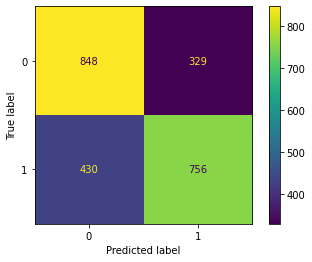

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,xtest,ytest);

In [81]:
log_model.coef_

array([[-0.22976984,  0.08572109,  0.03851866, -0.02260374,  0.08969215,
        -0.18235291, -0.64217565, -1.34209337, -1.15066698, -2.86203836,
        -3.35423128, -2.74030857, -0.28934788,  0.26402022, -0.97187423,
        -0.8067048 , -1.50046411, -0.97718324, -0.38532544]])

In [82]:
from sklearn.linear_model import LogisticRegressionCV 

In [83]:
log_model1 = LogisticRegressionCV()

In [84]:
log_model1.fit(xtrain,ytrain)

LogisticRegressionCV()

In [85]:
log_model1.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [86]:
y_pred = log_model.predict(xtest)

In [87]:
confusion_matrix(ytest,y_pred)

array([[848, 329],
       [430, 756]], dtype=int64)

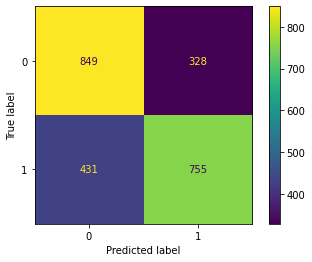

In [88]:
plot_confusion_matrix(log_model1,xtest,ytest)

In [89]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1177
           1       0.70      0.64      0.67      1186

    accuracy                           0.68      2363
   macro avg       0.68      0.68      0.68      2363
weighted avg       0.68      0.68      0.68      2363



# Model has an accuracy of 0.68

In [90]:
log_model1.predict_proba(xtest)

array([[0.02490758, 0.97509242],
       [0.31532785, 0.68467215],
       [0.42140781, 0.57859219],
       ...,
       [0.55995257, 0.44004743],
       [0.83115924, 0.16884076],
       [0.57428387, 0.42571613]])

In [90]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

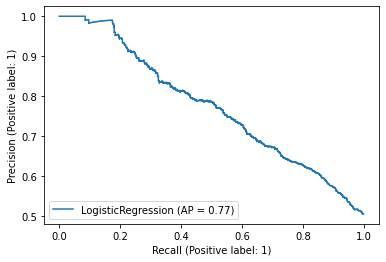

In [91]:
plot_precision_recall_curve(log_model,xtest,ytest)

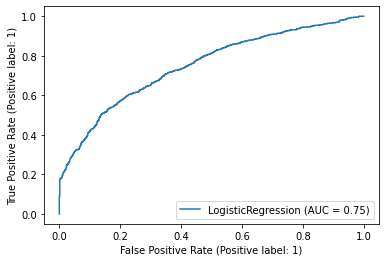

In [92]:
plot_roc_curve(log_model,xtest,ytest)

# Test assumptions of logistic regression

# 1) No Multicolinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

In [94]:
print(checking_vif(xtrain))

                         feature       VIF
0                           year  1.985227
1                  selling_price  3.267495
2                      km_driven  1.651536
3                        mileage  2.597785
4                         engine  4.452717
5                      max_power  4.161493
6                    Region_East  1.474511
7                   Region_South  1.384853
8                    Region_West  1.455459
9                    fuel_Diesel  5.437707
10                      fuel_LPG  1.035633
11                   fuel_Petrol  4.399407
12        seller_type_Individual  6.146198
13  seller_type_Trustmark Dealer  1.229613
14    owner_Fourth & Above Owner  1.066870
15            owner_Second Owner  1.508492
16          owner_Test Drive Car  1.021278
17             owner_Third Owner  1.179693
18           transmission_Manual  7.788263


# There seems to be no high Multi-collinearity.

# 2) Normailty of Residual

In [95]:
resd = ytest - y_pred

<AxesSubplot:xlabel='sold', ylabel='Density'>

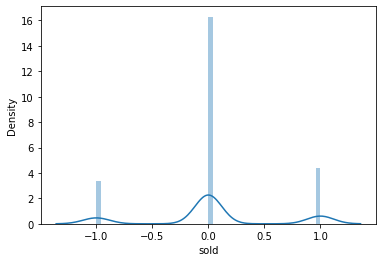

In [97]:
sns.distplot(resd)

# 3) Homoscedasticity

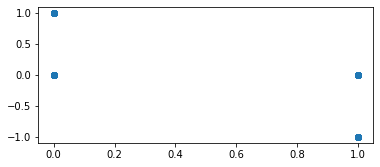

In [98]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, resd)

# 4) Auto-Correlation

In [99]:
import statsmodels.tsa.api as smt

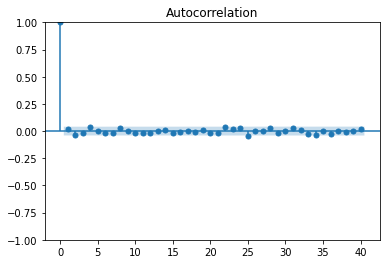

In [100]:
acf = smt.graphics.plot_acf(resd, lags=40 , alpha=0.05)
acf.show()

# As seen from the above graphs that the assumptions of logistic regression isn't fully satisfied so for this dataset Logistic regression isn't a very good option for prediction of sale of good. We can use other classifiers like Decision Trees or Random Forest for better performance.